In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataloading

In [9]:
import json

categorical_df = pd.read_excel("./data/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx")
quantitative_df = pd.read_excel("./data/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx")
solutions_df = pd.read_excel("./data/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx")

# load categorical labels
with open("categorical_labels.json", "r") as file:
    categorical_labels = json.load(file)

# json cant store keys of type int, cast int keys back to int
categorical_labels = {category: {int(key): label for key, label in mapping.items()} for category, mapping in categorical_labels.items()}

## Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import StandardScaler

df = pd.merge(categorical_df, quantitative_df, on="participant_id", how="inner")
df = pd.merge(df, solutions_df, on="participant_id", how="inner")

X = df.drop(columns=["participant_id", "ADHD_Outcome", "Sex_F"])
y = df["ADHD_Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Training

In [11]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.657     0.571     0.611        77
           1      0.812     0.861     0.836       166

    accuracy                          0.770       243
   macro avg      0.735     0.716     0.724       243
weighted avg      0.763     0.770     0.765       243



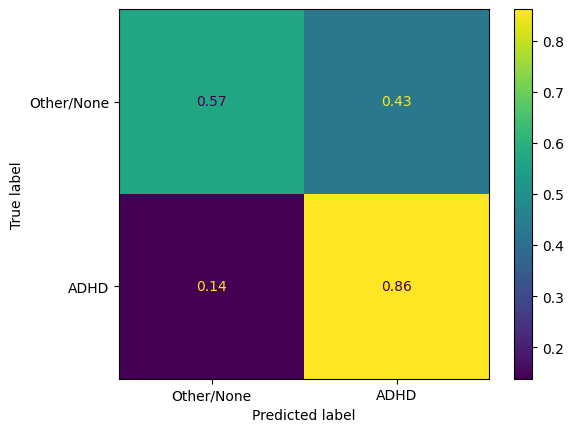

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', display_labels=categorical_labels['ADHD_Outcome'].values())
plt.show()

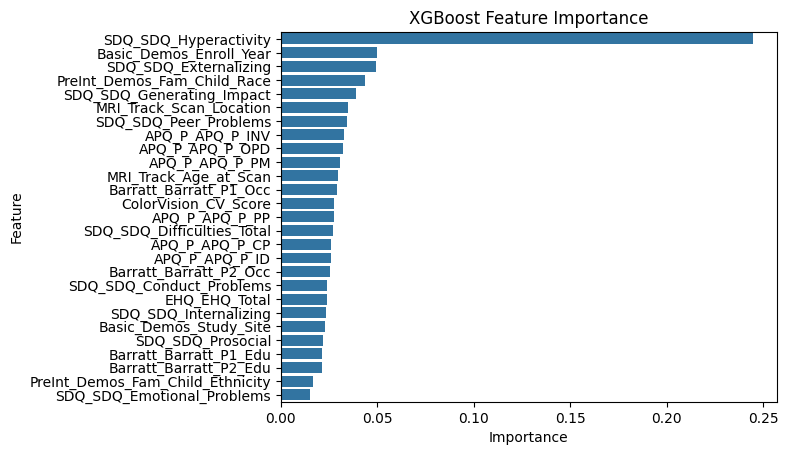

In [43]:
feature_importance_df = pd.DataFrame({
    'Importance': model.feature_importances_,
    'Feature': X.columns
}).sort_values(by='Importance', ascending=False)

plt.title('XGBoost Feature Importance')
sns.barplot(feature_importance_df, x='Importance', y='Feature')
plt.show()